<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap9/Q9/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime

datetime_object = datetime.datetime.now()
print(datetime_object)

2020-03-20 04:35:47.197121


In [2]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-nkpw9_tq
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-nkpw9_tq
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=dc3e6a45b1ec98a78e46891a47d965827035f0670ccd7d6b8971de83c23fe06f
  Stored in directory: /tmp/pip-ephem-wheel-cache-hdgrp0v8/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [3]:
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/Q9/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/Q9
evaluate.py
Albumentationtransform.py
train_test_loader.py
model.py
show_images.py
train_test.py
Untitled0.ipynb
checkpoint.pth.tar
QuizDNN.py
train_test_loader.cpython-36.pyc
show_images.cpython-36.pyc
model.cpython-36.pyc
train_test.cpython-36.pyc
evaluate.cpython-36.pyc
Albumentationtransform.cpython-36.pyc
cifar-10-python.tar.gz
test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta
readme.html


In [0]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import QuizDNN
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms

In [0]:
import albumentations as A

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
train_transform = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       #A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) # fillvalue is 0 after normalizing as mean is 0
                                       ])
# Test Phase transformations
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])

In [7]:
classes, trainloader, testloader = train_test_loader.load(train_transform,test_transform)


Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


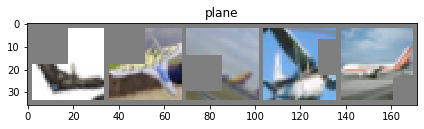

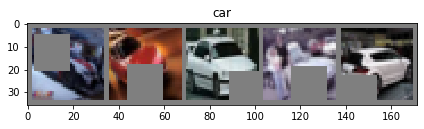

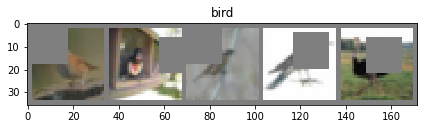

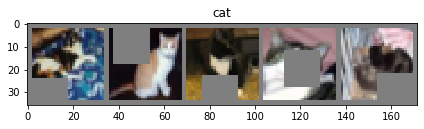

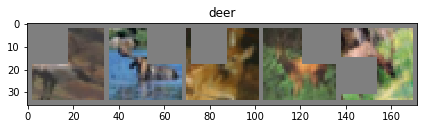

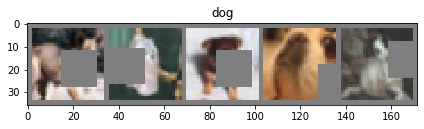

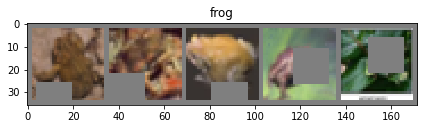

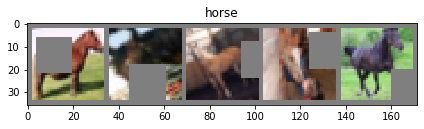

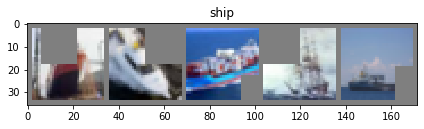

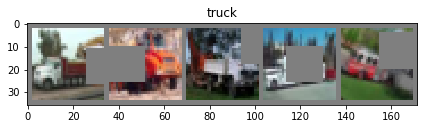

In [8]:
show_images.show_train_data(trainloader, classes)


In [0]:
'''import torch
import torch.nn as nn
class Net(nn.Module):
  def __init__(self):
        super(Net, self).__init__()

        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),     
            )
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            )
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            )
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            )
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),    
            )
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            )
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            )
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            )
        
        self.convblock9 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            )
        self.pool = nn.MaxPool2d(2, 2)
        
        self.gap = nn.Sequential(
            nn.AdaptiveAvgPool2d(1)
        )
            
        self.fc =  nn.Conv2d(in_channels=64, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)#Op_size = 1,
  
  def forward(self, x):
        x1 = self.convblock1(x)
         #x2 = Conv(x1)
        x2 = self.convblock9(x1)
        # x3 = Conv(x1 + x2)
        x3 = self.convblock2(x1+x2)
        #x4 = MaxPooling(x1 + x2 + x3)
        x4 = self.pool(x1+x2+x3) 
        #x5 = Conv(x4)
        x5 = self.convblock3(x4) 
        #x6 = Conv(x4 + x5)
        x6 = self.convblock4(x4+x5)
        #x7 = Conv(x4 + x5 + x6)
        x7 = self.convblock5(x4+x5+x6)
        #x8 = MaxPooling(x5 + x6 + x7)
        x8 = self.pool(x5+x6+x7) 
        #x9 = Conv(x8)
        x9 = self.convblock6(x8)
        #x10 = Conv (x8 + x9)
        x10 = self.convblock7(x8+x9)
        #x11 = Conv (x8 + x9 + x10)
        x11 = self.convblock8(x8+x9+x10)
        #x12 = GAP(x11)
        x12 = self.gap(x11)
        #x13 = FC(x12)
        x13 = self.fc(x12)

        x = x13.view(-1, 10)
        return x

        #x = self.conv1(x)
        #x = x.view(x.size(0), -1)
        #return F.log_softmax(x, dim=1) '''


In [10]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = QuizDNN.Net().to(device)
# model = model.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

In [0]:
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    #if is_best:
    #    shutil.copyfile(filename, 'model_best.pth.tar')

In [13]:
testLoss = []
testAcc = []
EPOCHS = 20
best_acc1 = 10
for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     scheduler.step()
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
     is_best = test_acc[-1] > best_acc1

     best_acc1 = max(test_acc[-1], best_acc1)
     save_checkpoint({
            'epoch': epoch + 1,
            
            'state_dict': model.state_dict(),
            'best_acc1': best_acc1,
            'optimizer' : optimizer.state_dict(),
        }, is_best)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.254713773727417 Batch_id=390 Accuracy=43.98: 100%|██████████| 391/391 [00:18<00:00, 20.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 5936/10000 (59.36%)

EPOCH: 2 LR: 0.1


Loss=1.051796793937683 Batch_id=390 Accuracy=56.99: 100%|██████████| 391/391 [00:18<00:00, 20.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 6102/10000 (61.02%)

EPOCH: 3 LR: 0.1


Loss=0.9233196973800659 Batch_id=390 Accuracy=61.99: 100%|██████████| 391/391 [00:18<00:00, 20.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7160/10000 (71.60%)

EPOCH: 4 LR: 0.1


Loss=1.004679560661316 Batch_id=390 Accuracy=65.22: 100%|██████████| 391/391 [00:19<00:00, 20.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 7002/10000 (70.02%)

EPOCH: 5 LR: 0.1


Loss=0.8390801548957825 Batch_id=390 Accuracy=67.07: 100%|██████████| 391/391 [00:19<00:00, 20.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7307/10000 (73.07%)

EPOCH: 6 LR: 0.1


Loss=0.9071256518363953 Batch_id=390 Accuracy=67.97: 100%|██████████| 391/391 [00:19<00:00, 20.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7140/10000 (71.40%)

EPOCH: 7 LR: 0.1


Loss=0.9491769075393677 Batch_id=390 Accuracy=68.99: 100%|██████████| 391/391 [00:18<00:00, 20.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7429/10000 (74.29%)

EPOCH: 8 LR: 0.1


Loss=0.7299458980560303 Batch_id=390 Accuracy=69.62: 100%|██████████| 391/391 [00:19<00:00, 20.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7614/10000 (76.14%)

EPOCH: 9 LR: 0.1


Loss=0.8021051287651062 Batch_id=390 Accuracy=70.17: 100%|██████████| 391/391 [00:18<00:00, 20.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7341/10000 (73.41%)

EPOCH: 10 LR: 0.1


Loss=0.8576386570930481 Batch_id=390 Accuracy=70.73: 100%|██████████| 391/391 [00:18<00:00, 20.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7586/10000 (75.86%)

EPOCH: 11 LR: 0.1


Loss=0.7808730006217957 Batch_id=390 Accuracy=71.20: 100%|██████████| 391/391 [00:18<00:00, 20.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7615/10000 (76.15%)

EPOCH: 12 LR: 0.1


Loss=0.698502242565155 Batch_id=390 Accuracy=71.42: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7713/10000 (77.13%)

EPOCH: 13 LR: 0.1


Loss=0.651461124420166 Batch_id=390 Accuracy=71.49: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7831/10000 (78.31%)

EPOCH: 14 LR: 0.1


Loss=0.988726019859314 Batch_id=390 Accuracy=71.81: 100%|██████████| 391/391 [00:18<00:00, 20.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7910/10000 (79.10%)

EPOCH: 15 LR: 0.1


Loss=1.0020688772201538 Batch_id=390 Accuracy=72.24: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7507/10000 (75.07%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.7294732928276062 Batch_id=390 Accuracy=76.88: 100%|██████████| 391/391 [00:18<00:00, 20.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8500/10000 (85.00%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.6730974912643433 Batch_id=390 Accuracy=78.88: 100%|██████████| 391/391 [00:18<00:00, 20.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8555/10000 (85.55%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.494378000497818 Batch_id=390 Accuracy=79.18: 100%|██████████| 391/391 [00:18<00:00, 20.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8567/10000 (85.67%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.6655721068382263 Batch_id=390 Accuracy=79.85: 100%|██████████| 391/391 [00:18<00:00, 20.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8590/10000 (85.90%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.6201855540275574 Batch_id=390 Accuracy=80.33: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]



Test set: Average loss: 0.0033, Accuracy: 8584/10000 (85.84%)



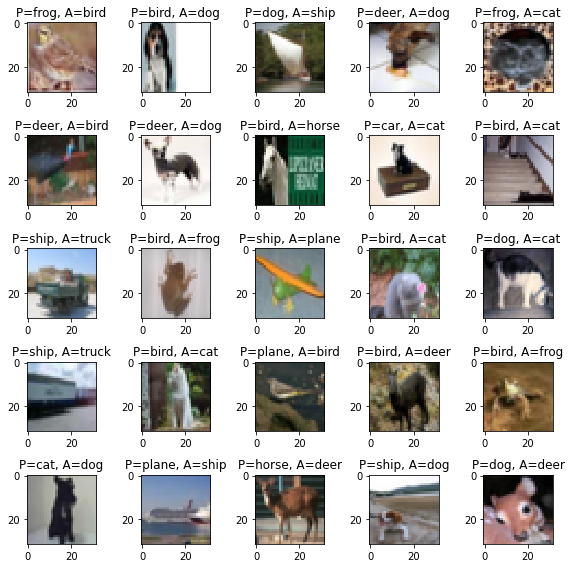

In [14]:
evaluate.show_misclassified_images(model, device, testloader, classes)


In [15]:
evaluate.evaluate_accuracy(model, device, testloader)


Accuracy of the network on the 10000 test images: 85 %


In [16]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)


Accuracy of plane : 89 %
Accuracy of   car : 94 %
Accuracy of  bird : 85 %
Accuracy of   cat : 68 %
Accuracy of  deer : 85 %
Accuracy of   dog : 74 %
Accuracy of  frog : 88 %
Accuracy of horse : 88 %
Accuracy of  ship : 92 %
Accuracy of truck : 91 %


Text(0.5, 1.0, 'Test Accuracy')

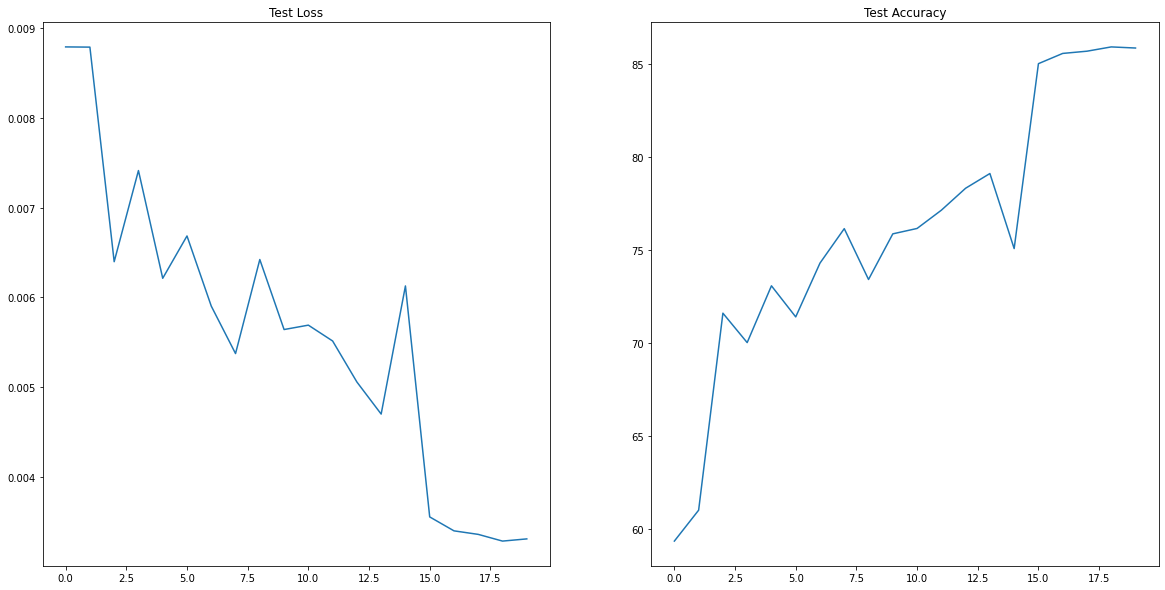

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")

In [18]:
print(test_loss)


[0.008789878487586975, 0.008787473642826081, 0.006398359656333923, 0.007413199585676193, 0.006213740372657776, 0.006684902000427246, 0.005904115337133408, 0.005375541090965271, 0.0064226444989442825, 0.005643192553520203, 0.005691965782642364, 0.005515617367625236, 0.00505908545255661, 0.004701905682682991, 0.0061285189807415005, 0.003556906905770302, 0.0034017494171857832, 0.0033623883426189423, 0.0032876948595047, 0.0033121464639902115]


In [19]:
print(test_acc)


[59.36, 61.02, 71.6, 70.02, 73.07, 71.4, 74.29, 76.14, 73.41, 75.86, 76.15, 77.13, 78.31, 79.1, 75.07, 85.0, 85.55, 85.67, 85.9, 85.84]
